#Do alcohol establishments affect crime in the area?

##Library loading

Does the presence of businesses related to alcohol and tobacco cause more crimes in surrounding areas?

In [ ]:
pip install sodapy

In [ ]:
import pandas as pd
from sodapy import Socrata
import numpy as np
import matplotlib.pyplot as plt


##Loading Data

In [ ]:
#connect to the data portal using app token
client = Socrata("data.cityofchicago.org", "170ywTMm01BE37S2mmzT8QK7h")

In [ ]:
#get corresponding dataset with the dataset identifer, limit 55k since dataset has 54986 values
results = client.get("uupf-x98q", limit = 55000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [ ]:
np.shape(results_df)

(55000, 33)

In [ ]:
results_df.columns

Index(['license_description', 'zip_code', 'license_id', 'location',
       'date_issued', 'city', 'ward_precinct', 'address', 'license_status',
       'conditional_approval', 'state', 'payment_date', 'business_activity',
       'license_start_date', 'latitude', 'precinct',
       'application_requirements_complete', 'ward', 'doing_business_as_name',
       'police_district', 'business_activity_id', 'longitude',
       'application_type', 'license_number', 'license_approved_for_issuance',
       'expiration_date', 'account_number', 'site_number', 'license_code',
       'legal_name', 'id', 'ssa', 'application_created_date'],
      dtype='object')

In [ ]:
#We can see that there are multiple descriptions for alcohol serving businesses.
#the types of liquor licenses can be found here https://www.chicago.gov/city/en/depts/bacp/supp_info/classes_of_liquorlicenses.html
results_df["license_description"].value_counts()

Limited Business License                               17412
Retail Food Establishment                              11204
Regulated Business License                              8220
Consumption on Premises - Incidental Activity           2803
Tobacco                                                 1977
Motor Vehicle Services License                          1497
Peddler License                                         1219
Package Goods                                           1152
Children's Services Facility License                     843
Tavern                                                   818
Public Place of Amusement                                808
Manufacturing Establishments                             739
Outdoor Patio                                            720
Pharmaceutical Representative                            675
Shared Kitchen User (Long Term)                          607
Commercial Garage                                        577
Wholesale Food Establish

##Filtering Data

We only want data which relates to alcohol and tobacco, so we filter it out before cleaning relevant columns.

In [ ]:
#packaged goods license can be used by groceries too, so we are not including that.
alcohol_related_descriptions = [
    "Caterer's Liquor License",
    "Consumption on Premises - Incidental Activity",
    "Tavern",
    "Late Hour",
    "Special Event Liquor",
    "Late Hour",
    "Outdoor Patio"
]

In [ ]:
# Filter the DataFrame based on the provided list of descriptions
alcohol_business_df = results_df[results_df['license_description'].isin(alcohol_related_descriptions)]

# Display the filtered DataFrame
alcohol_business_df.shape

(4732, 33)

In [ ]:
alcohol_business_df["license_description"].value_counts()

Consumption on Premises - Incidental Activity    2803
Tavern                                            818
Outdoor Patio                                     720
Caterer's Liquor License                          264
Late Hour                                         126
Special Event Liquor                                1
Name: license_description, dtype: int64

##Cleaning data

we mainly care about the location of these stores, so let's make sure we dont have null values for lat and long

In [ ]:
alcohol_business_df["latitude"]

5        41.867452731
34       41.932859817
35       41.943316391
38       41.921614362
44       41.944772763
             ...     
54955             NaN
54973    41.887808158
54994    41.967357849
54995    41.943286551
54998    41.791349424
Name: latitude, Length: 4732, dtype: object

In [ ]:
alcohol_business_df["latitude"].isna().any()

True

In [ ]:
alcohol_business_df["longitude"].isna().any()

True

Since we have null values in both, let us get rid of the null lat and long so we can visualize the data

In [ ]:
lat_long_mask = alcohol_business_df['latitude'].notna() & alcohol_business_df['longitude'].notna()
filtered_df = alcohol_business_df[lat_long_mask]

In [ ]:
filtered_df

,license_description,zip_code,license_id,location,date_issued,city,ward_precinct,address,license_status,conditional_approval,...,license_number,license_approved_for_issuance,expiration_date,account_number,site_number,license_code,legal_name,id,ssa,application_created_date
5,Consumption on Premises - Incidental Activity,60605,2937935,"{'latitude': '41.86745273087616', 'human_addre...",2023-11-02T00:00:00.000,CHICAGO,34-,150 W ROOSEVELT RD A101,AAI,N,...,2812689,2023-10-16T00:00:00.000,2025-10-15T00:00:00.000,479191,1,1475,"THE X POT CHICAGO, LLC.",2812689-20231216,NaN,NaN
34,Consumption on Premises - Incidental Activity,60657,2936680,"{'latitude': '41.93285981738872', 'human_addre...",2023-10-17T00:00:00.000,CHICAGO,44-18,2801 N BROADWAY 1,AAI,N,...,2817868,2023-10-16T00:00:00.000,2024-12-15T00:00:00.000,392906,21,1475,"FOXTROT VENTURES, INCORPORATED",2817868-20231216,8,NaN
35,Consumption on Premises - Incidental Activity,60618,2937541,"{'latitude': '41.943316391093994', 'human_addr...",2023-10-17T00:00:00.000,CHICAGO,32-21,2022 W ROSCOE ST LL-1,AAI,N,...,2689716,2023-10-16T00:00:00.000,2025-12-15T00:00:00.000,462417,1,1475,ROSCOE SAME LLC,2689716-20231216,NaN,NaN
38,Consumption on Premises - Incidental Activity,60647,2937350,"{'latitude': '41.92161436223205', 'human_addre...",2023-10-17T00:00:00.000,CHICAGO,1-34,2246 N MILWAUKEE AVE 1,AAI,N,...,2609691,2023-10-16T00:00:00.000,2025-12-15T00:00:00.000,429198,1,1475,"VICTORY GRILL, INC.",2609691-20231216,NaN,NaN
44,Outdoor Patio,60657,2936800,"{'latitude': '41.94477276328082', 'human_addre...",2023-10-17T00:00:00.000,CHICAGO,44-36,3441 N SHEFFIELD AVE 1ST,AAI,N,...,2428447,2023-10-16T00:00:00.000,2025-12-15T00:00:00.000,401568,1,1477,3441 HOSPITALITY GROUP LLC,2428447-20231216,17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54945,Consumption on Premises - Incidental Activity,60614,2683295,"{'latitude': '41.92557753673624', 'human_addre...",2021-11-15T00:00:00.000,CHICAGO,43-21,736-738 W FULLERTON AVE 1-2,AAI,Y,...,2683295,2021-11-15T00:00:00.000,2023-12-15T00:00:00.000,460768,1,1475,"BOURGEOIS PIG, LLC",2683295-20211115,35,2019-07-15T00:00:00.000
54973,Caterer's Liquor License,60607,2796751,"{'latitude': '41.887808158349756', 'human_addr...",2021-11-10T00:00:00.000,CHICAGO,27-,333 N GREEN ST 6-8,AAI,N,...,2796751,2021-11-09T00:00:00.000,2023-11-15T00:00:00.000,476165,1,1481,"Convene at 333 N. Green, LLC",2796751-20211110,NaN,2021-06-22T00:00:00.000
54994,Tavern,60640,2802494,"{'latitude': '41.967357848702456', 'human_addr...",2021-11-10T00:00:00.000,CHICAGO,47-,4710 N RAVENSWOOD AVE 1,AAI,Y,...,2802494,2021-11-10T00:00:00.000,2023-11-15T00:00:00.000,476952,1,1470,FR RESTAURANT LLC,2802494-20211110,31,2021-07-19T00:00:00.000
54995,Consumption on Premises - Incidental Activity,60618,2813228,"{'latitude': '41.94328655132956', 'human_addre...",2021-11-09T00:00:00.000,CHICAGO,32-,2118-2122 W ROSCOE ST,AAI,N,...,2813228,2021-11-09T00:00:00.000,2023-11-15T00:00:00.000,479729,1,1475,Amor y Tequila LLC,2813228-20211109,NaN,2021-09-28T00:00:00.000


In [ ]:
print(filtered_df["latitude"].isna().any() or filtered_df["longitude"].isna().any())

False


We can see that we have removed all the businesses with null values in the latitude and longitude columns and we went from 4729 to 4680, so only 49 null values which is not bad
Now let us also check the type of the values in the columns latitude and longitude since they are normally float values

In [ ]:
filtered_df["longitude"].dtype

dtype('O')

Type '0' means that the column is currently of mixed type, we can assume latitude might also be mixed, so we can convert both to float so that we can plot them easily.

In [ ]:
filtered_df['longitude'] = filtered_df['longitude'].astype(float)
filtered_df['latitude'] = filtered_df['latitude'].astype(float)

<ipython-input-32-779a358f8f48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['longitude'] = filtered_df['longitude'].astype(float)
<ipython-input-32-779a358f8f48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['latitude'] = filtered_df['latitude'].astype(float)


##Analysing data at hand

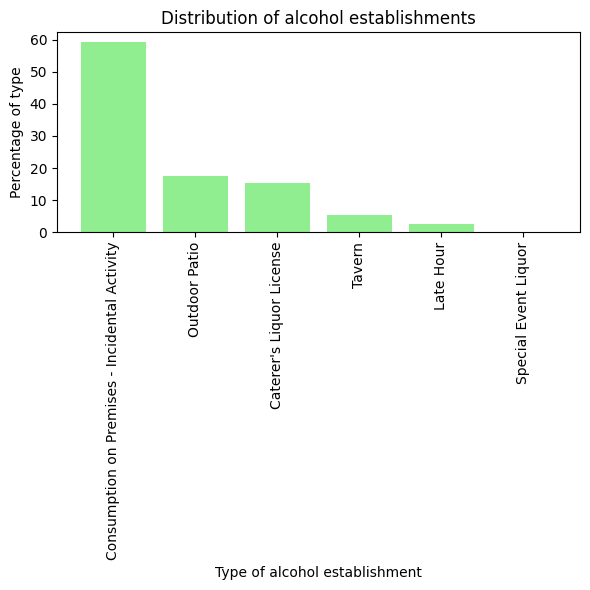

In [ ]:
plt.figure(figsize=(6, 6))
plt.bar(filtered_df['license_description'].unique(), (filtered_df['license_description'].value_counts())*100/filtered_df['license_description'].value_counts().sum(), color='lightgreen')
plt.xlabel('Type of alcohol establishment')
plt.ylabel('Percentage of type')
plt.title('Distribution of alcohol establishments')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

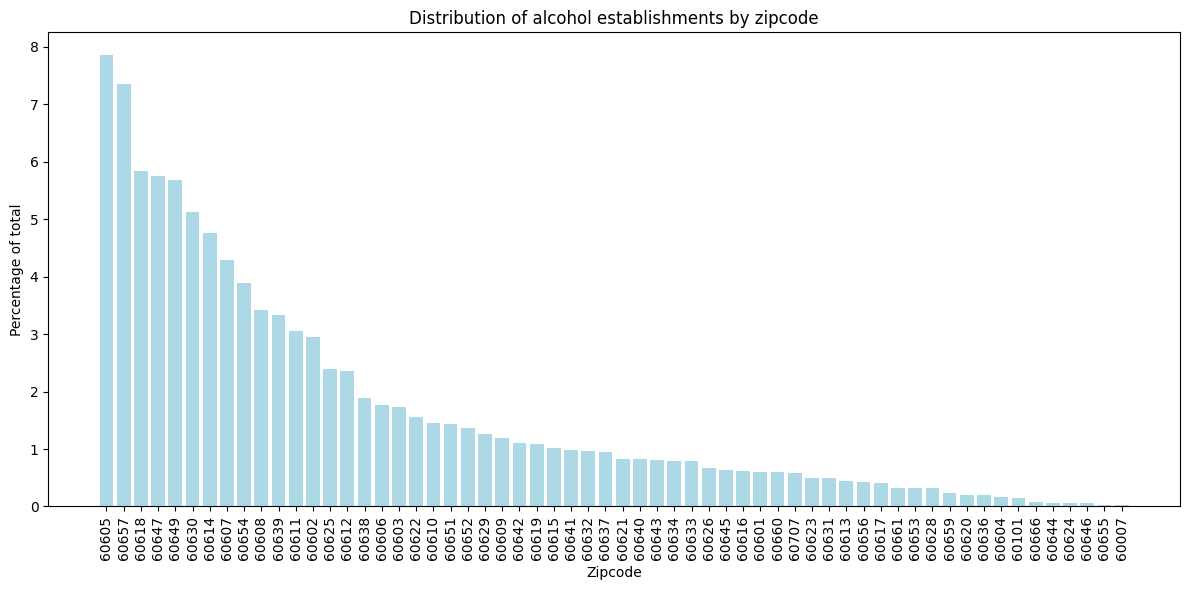

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(filtered_df['zip_code'].unique(), (filtered_df['zip_code'].value_counts())*100/filtered_df['zip_code'].value_counts().sum(), color='lightblue')
plt.xlabel('Zipcode')
plt.ylabel('Percentage of total')
plt.title('Distribution of alcohol establishments by zipcode')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

##Plotting geospatial data

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
fig = px.scatter_mapbox(
    filtered_df,
    lat="latitude",
    lon="longitude",
    hover_name="license_description",
    zoom=10
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
)
fig.show()

##Clustering the data points

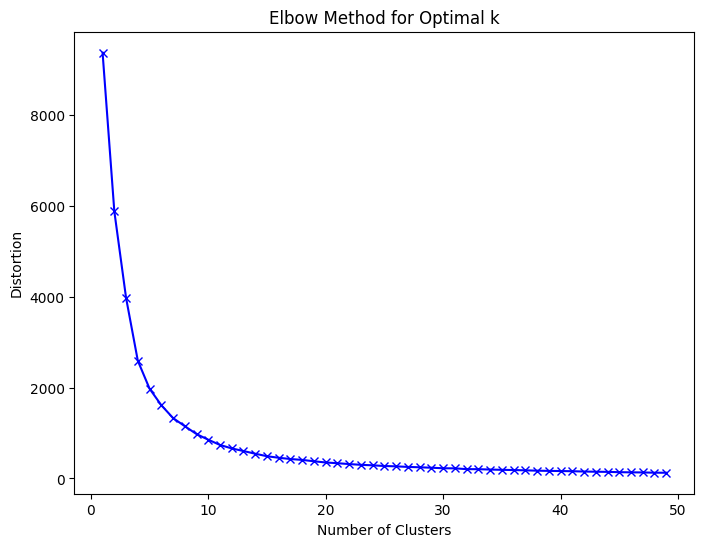

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Extract latitude and longitude
lat_lon_data = filtered_df[['latitude', 'longitude']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(lat_lon_data)

# Determine the optimal number of clusters (k) using the Elbow Method
distortions = []
K = range(1, 50)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init = 10, random_state=0)
    kmeans.fit(scaled_data)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-50-16fb8e04ef0e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



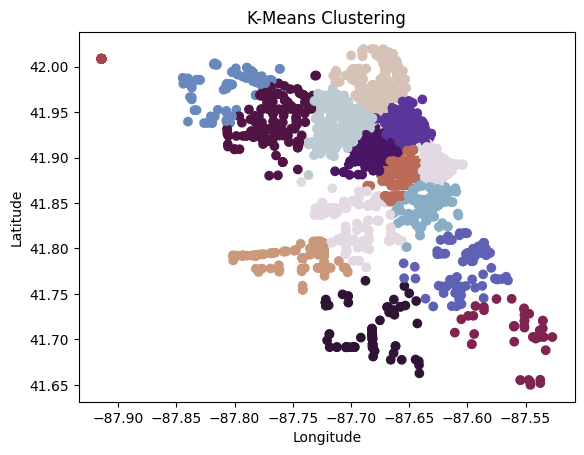

In [ ]:
# Let us choose an appropriate k based on the plot, k = 10 since that is the elbow

# Fit the K-Means model with the selected k
k = 15
kmeans = KMeans(n_clusters=k, random_state=0)
filtered_df['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize clusters on a scatter plot
plt.scatter(filtered_df['longitude'], filtered_df['latitude'], c=filtered_df['cluster'], cmap='twilight')
plt.title('K-Means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

##Loading crime data of 2022

In [ ]:
results = client.get("9hwr-2zxp", limit = 239000, where = "date between '2022-12-01T00:00:00' and '2022-12-31T00:00:00'")
# Convert to pandas DataFrame


In [ ]:
crime_df = pd.DataFrame.from_records(results)

In [ ]:
crime_df["date"].value_counts

<bound method IndexOpsMixin.value_counts of 0        2022-12-31T00:00:00.000
1        2022-12-31T00:00:00.000
2        2022-12-31T00:00:00.000
3        2022-12-31T00:00:00.000
4        2022-12-31T00:00:00.000
                  ...           
19205    2022-12-01T00:00:00.000
19206    2022-12-01T00:00:00.000
19207    2022-12-01T00:00:00.000
19208    2022-12-01T00:00:00.000
19209    2022-12-01T00:00:00.000
Name: date, Length: 19210, dtype: object>

In [ ]:
crime_df.head()

,date,district,block,description,location_description,updated_on,community_area,iucr,ward,case_number,...,fbi_code,beat,primary_type,arrest,id,location,y_coordinate,latitude,x_coordinate,longitude
0,2022-12-31T00:00:00.000,008,064XX S KILPATRICK AVE,TELEPHONE THREAT,RESIDENCE,2023-01-23T15:42:15.000,64,2820,13,JG125567,...,08A,0813,OTHER OFFENSE,False,12960359,NaN,NaN,NaN,NaN,NaN
1,2022-12-31T00:00:00.000,006,091XX S PRINCETON AVE,VIOLATE ORDER OF PROTECTION,APARTMENT,2023-01-24T15:42:46.000,49,4387,21,JG126529,...,26,0634,OTHER OFFENSE,False,12961793,NaN,NaN,NaN,NaN,NaN
2,2022-12-31T00:00:00.000,025,051XX W WABANSIA AVE,FORGERY,OTHER (SPECIFY),2023-02-26T15:41:59.000,25,1120,37,JG165434,...,10,2533,DECEPTIVE PRACTICE,False,12993418,NaN,NaN,NaN,NaN,NaN
3,2022-12-31T00:00:00.000,002,013XX E 49TH ST,TO VEHICLE,STREET,2023-01-07T15:41:08.000,39,1320,4,JF528298,...,14,0222,CRIMINAL DAMAGE,False,12937541,"{'latitude': '41.806045832', 'human_address': ...",1872783,41.806045832,1186111,-87.592932479
4,2022-12-31T00:00:00.000,020,059XX N RAVENSWOOD AVE,$500 AND UNDER,APARTMENT,2023-01-07T15:41:08.000,77,0820,40,JF528599,...,06,2012,THEFT,False,12937733,"{'latitude': '41.989658338', 'human_address': ...",1939510,41.989658338,1163311,-87.674675502


In [ ]:
crime_df.shape

(19210, 22)

let us check for null values in the latitude and longitude columns of the crime data

In [ ]:
crime_df["latitude"].isna().any()

True

In [ ]:
crime_df["longitude"].isna().any()

True

Since both have null values, let us remove them and then convert them to a geo dataframe for further analysis.

In [ ]:
lat_long_mask = crime_df['latitude'].notna() & crime_df['longitude'].notna()
crime_df = crime_df[lat_long_mask]
crime_df.isna().any()

date                    False
district                False
block                   False
description             False
location_description     True
updated_on              False
community_area          False
iucr                    False
ward                    False
case_number             False
year                    False
domestic                False
fbi_code                False
beat                    False
primary_type            False
arrest                  False
id                      False
location                False
y_coordinate            False
latitude                False
x_coordinate            False
longitude               False
dtype: bool

we see that latitude and longitude have no more null values. now let us convert them into geo dataframe

convert lat and long to float

In [ ]:
crime_df.latitude = crime_df.latitude.astype('float')
crime_df.longitude = crime_df.longitude.astype('float')

<ipython-input-213-f81a7d8431ea>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-213-f81a7d8431ea>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
!pip install pysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 65.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.9/112.9 kB 11.1 M

In [ ]:
!pip install libpysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.5 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement esda.moran (from versions: none)
ERROR: No matching distribution found for esda.moran


In [ ]:
!pip install contextily

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
from libpysal.weights import Queen
from esda.moran import Moran
import statsmodels.api as sm
from libpysal.weights import WSP
import contextily as ctx

In [ ]:
# Create GeoDataFrames from Pandas DataFrames
crime = gpd.GeoDataFrame(crime_df,
                         crs = "EPSG:4326",
                         geometry = gpd.points_from_xy(crime_df.longitude, crime_df.latitude))
alcohol = gpd.GeoDataFrame(filtered_df,
                         crs = "EPSG:4326",
                         geometry = gpd.points_from_xy(filtered_df.longitude, filtered_df.latitude))

In [ ]:
#chicago is lat 41.868 and long -87.665, so let us look within that

In [ ]:
crime = crime[(crime["longitude"] > -88) & (crime["latitude"] < 42)]

/usr/local/lib/python3.10/dist-packages/contextily/tile.py:614: UserWarning:

The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 20).



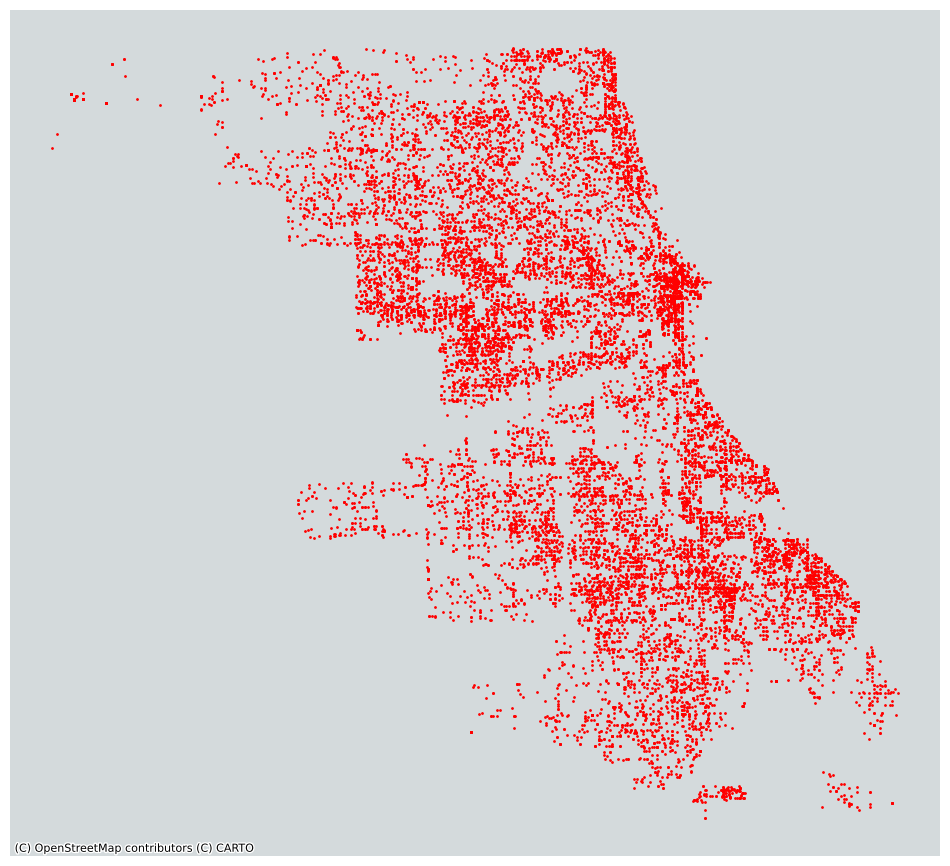

In [ ]:
fig,ax = plt.subplots(figsize=(12,12))

crime.plot(ax=ax,
             color='red',
             markersize=1)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [ ]:
#let us check for correlation between the establishments and crime

In [ ]:
#need more time to find out how to correlate the location of alcohol establishment to the occurence of crimes

##Clustering the crime occurencces

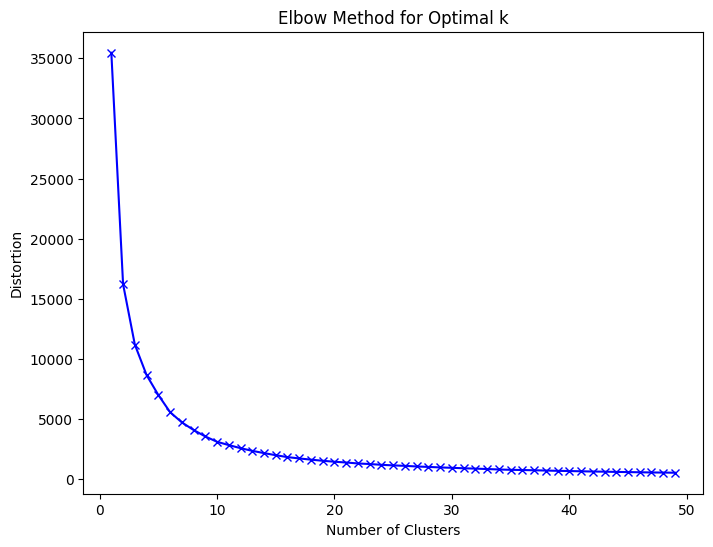

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Extract latitude and longitude
lat_lon_data = crime_df[['latitude', 'longitude']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(lat_lon_data)

# Determine the optimal number of clusters (k) using the Elbow Method
distortions = []
K = range(1, 50)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init = 10, random_state=0)
    kmeans.fit(scaled_data)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-222-8f9332f9c3c8>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



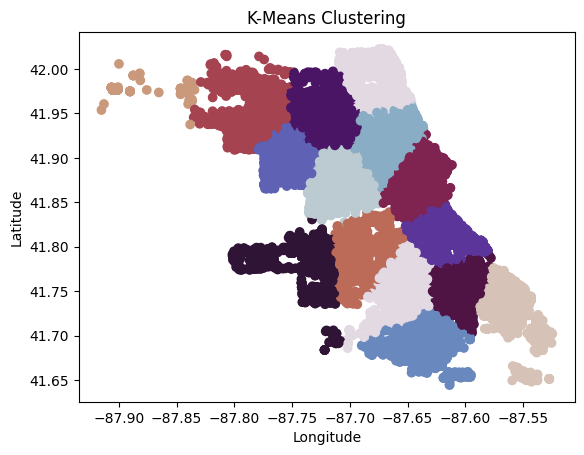

In [ ]:
# Let us choose an appropriate k based on the plot, k = 10 since that is the elbow

# Fit the K-Means model with the selected k
k = 15
kmeans = KMeans(n_clusters=k, random_state=0)
crime_df['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize clusters on a scatter plot
plt.scatter(crime_df['longitude'], crime_df['latitude'], c=crime_df['cluster'], cmap='twilight')
plt.title('K-Means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()